In [2]:
import numpy as np

In [3]:
x = list(np.arange(-1.,1.,0.001)) 


In [4]:
import math as mt

MI = list(np.arange(1.,mt.pi,2.0/51.0)) 


In [5]:
import matplotlib.pyplot as plt 

snapshots =[]
for mi in MI:
    y = list(map(lambda x : (1-x)*mt.cos(mt.pi*3*mi*(x+1))*mt.exp(-(1+x)*mi) , x))
    snapshots.append(y[:])  
    # plotting the points  
    plt.plot(x,y) 

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('A nonlinear parametrized function with spatial points in one dimension.') 
  
# function to show the plot 
plt.show() 

<Figure size 640x480 with 1 Axes>

In [6]:
snaps = np.array(snapshots)
snaps.shape

(55, 2000)

In [7]:
u, s, vh = np.linalg.svd(snaps, full_matrices=True)


In [8]:
u.shape

(55, 55)

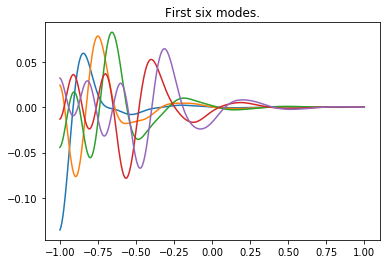

In [9]:
for i in range(0,5):
    plt.plot(x,vh[i])


plt.title('First six modes.') 
plt.show()


In [26]:
arr = np.array([])

maxE = np.amax(vh[0])
index = np.where(vh[0]==maxE)[0][0]
index
arr = np.append(arr,index)
arr


array([154.])

In [39]:
arr = np.array([])

# Step 1

maxE = np.amax(vh[0])
index = np.where(vh[0]==maxE)[0][0]
arr = np.append(arr,index)

E1 = np.zeros(2000)
E1[index]=1.0
U1=snaps[0,:]


# Step 2
a = np.transpose(E1).dot(U1)
U2 = vh[1,:]
b = np.transpose(E1).dot(U2)
c = b/a # np.solve must be minimal two dimensional
r1= U2 -U1*c
maxE = np.amax(r1)
index = np.where(r1==maxE)
arr = np.append(arr,index[0][0])

E2 = np.zeros(2000)
E2[index]=1.0
P = np.vstack((E1, E2))
U = np.vstack((U1, U2))

# Step 3
U3=vh[2]
c = np.linalg.solve(np.dot(P,np.transpose(U)),np.dot(P,np.transpose(U3)))
r= U3 -np.dot(c,U)
maxE = np.amax(r)
index = np.where(r==maxE)
arr = np.append(arr,index[0][0])

E3 = np.zeros(2000)
E3[index]=1.0
P = np.vstack((P, E3))
U = np.vstack((U, U3))

# Step 4
U4=vh[3]
c = np.linalg.solve(np.dot(P,np.transpose(U)),np.dot(P,np.transpose(U4)))
r= U4 -np.dot(c,U)
maxE = np.amax(r)
index = np.where(r==maxE)
arr = np.append(arr,index[0][0])

E4 = np.zeros(2000)
E4[index]=1.0
P = np.vstack((P, E4))
U = np.vstack((U, U4))


# Step 4
U5=vh[3]
c = np.linalg.solve(np.dot(P,np.transpose(U)),np.dot(P,np.transpose(U5)))
r= U5 -np.dot(c,U)
maxE = np.amax(r)
index = np.where(r==maxE)
arr = np.append(arr,index[0][0])

E5 = np.zeros(2000)
E5[index]=1.0
P = np.vstack((P, E5))
U = np.vstack((U, U5))

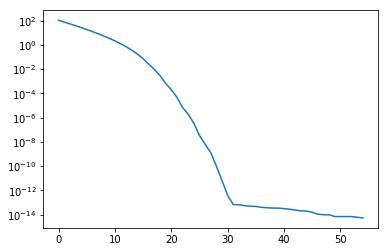

In [12]:
s.shape
modes = np.arange(0,55)

plt.semilogy(modes,s)


In [40]:
arr

array([154.,   0.,  90., 592., 230.])

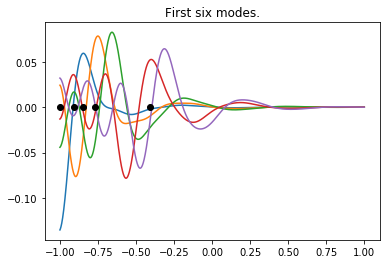

array([-0.846, -1.   , -0.91 , -0.408, -0.77 ])

In [41]:
for i in range(0,5):
    plt.plot(x,vh[i])

pos = np.array([])    
for i in range(0,arr.shape[0]):
    pos=np.append(pos,x[int(arr[i])])

yy = np.zeros(arr.shape[0])
    
plt.plot(pos, yy, 'o', color='black');

plt.title('First six modes.') 
plt.show()
pos

In [1]:
pos

NameError: name 'pos' is not defined